<a href="https://colab.research.google.com/github/sorayutmild/loan-default-prediction/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
url ='https://github.com/sorayutmild/loan-default-prediction/blob/main/transformed_data/final_transformed_data.csv?raw=true'
raw_df = pd.read_csv(url)
raw_df.head()

,account_id,loan_amount,loan_duration,loan_payments,loan_status,acc_frequency,day_before_loan,sum_monthly_payment_amount,sum_monthly_payment_amount_in,sum_monthly_payment_amount_out,...,amount_last_mount_out_per_loan_amount,amount_last_3months_avg,amount_last_3months_in_avg,amount_last_3months_out_avg,amount_last_3months_per_loan_payments,amount_last_3months_in_per_loan_payments,amount_last_3months_out_per_loan_payments,amount_last_3months_per_loan_amount,amount_last_3months_in_per_loan_amount,amount_last_3months_out_per_loan_amount
0,2,80952,24,3373,A,monthly,313,120.482428,4.124601,116.357827,...,0.425894,44114.333333,23734.666667,20379.666667,13.078664,7.036664,6.042000,0.544944,0.293194,0.251750
1,19,30276,12,2523,B,monthly,388,335.966495,7.306701,328.659794,...,0.601632,36373.333333,17858.333333,18515.000000,14.416700,7.078214,7.338486,1.201392,0.589851,0.611540
2,25,30276,12,2523,A,monthly,498,204.881526,8.206827,196.674699,...,3.150482,115321.666667,53753.000000,61568.666667,45.708152,21.305192,24.402959,3.809013,1.775433,2.033580
3,37,318480,60,5308,D,monthly,422,74.492891,5.457346,69.035545,...,0.103344,60867.000000,30319.333333,30547.666667,11.467031,5.712007,5.755024,0.191117,0.095200,0.095917
4,38,110736,48,2307,C,weekly,254,117.125984,4.385827,112.740157,...,0.089312,29212.333333,16590.333333,12622.000000,12.662477,7.191302,5.471175,0.263802,0.149819,0.113983


In [4]:
#ref = https://www.in2013dollars.com/czechia/inflation/1999?amount=100
rate = 1.44724 # 1 CZK = 1.44724 THB
name_chang_rate = ['loan_amount', 'loan_payments', 'sum_monthly_payment_amount',
       'sum_monthly_payment_amount_in', 'sum_monthly_payment_amount_out',
       'sum_monthly_payment_out_household',
       'sum_monthly_payment_out_insurrance',
       'sum_monthly_payment_in_interest_credited',
       'sum_monthly_payment_out_payment_for_statement',
       'sum_monthly_payment_out_sanction_interest_neg_bal',
        'current_monthly_payment_amount_out',
       'current_monthly_payment_out_household',
       'current_monthly_payment_out_insurrance',
       'current_monthly_payment_out_payment_for_statement',
       'current_monthly_payment_in_interest_credited',
        'sum_other_amount', 'sum_other_amount_in', 'sum_other_amount_out',
       'avg_salary', 'balance_latest', 
       ]

#Czechia Inflation Calculator
CPI_1999	= 69.750
CPI_2022	= 126.367
#raw_df[name_chang_rate] = raw_df[name_chang_rate]*(CPI_2022/CPI_1999)

# CZK -> THB
#raw_df[name_chang_rate] = raw_df[name_chang_rate]*rate

#raw_df.head(5)

In [5]:
raw_df['default'] = (raw_df['loan_status'] == 'B') | (raw_df['loan_status'] == 'D') # y => bad '1' , good '0'
#aw_df['default']  = raw_df['default'].astype('float')

raw_df['client_gender'] =  (raw_df['client_gender'] == 'M')
raw_df['client_gender'] = raw_df['client_gender'].astype('float')

account_id = pd.DataFrame(raw_df['account_id'])
raw_df = raw_df.drop(['loan_status', 'account_id'], axis=1)
raw_df.head()

,loan_amount,loan_duration,loan_payments,acc_frequency,day_before_loan,sum_monthly_payment_amount,sum_monthly_payment_amount_in,sum_monthly_payment_amount_out,sum_monthly_payment_out_household,sum_monthly_payment_out_insurrance,...,amount_last_3months_avg,amount_last_3months_in_avg,amount_last_3months_out_avg,amount_last_3months_per_loan_payments,amount_last_3months_in_per_loan_payments,amount_last_3months_out_per_loan_payments,amount_last_3months_per_loan_amount,amount_last_3months_in_per_loan_amount,amount_last_3months_out_per_loan_amount,default
0,80952,24,3373,monthly,313,120.482428,4.124601,116.357827,116.070288,0.000000,...,44114.333333,23734.666667,20379.666667,13.078664,7.036664,6.042000,0.544944,0.293194,0.251750,False
1,30276,12,2523,monthly,388,335.966495,7.306701,328.659794,328.350515,0.000000,...,36373.333333,17858.333333,18515.000000,14.416700,7.078214,7.338486,1.201392,0.589851,0.611540,True
2,30276,12,2523,monthly,498,204.881526,8.206827,196.674699,191.642570,4.610442,...,115321.666667,53753.000000,61568.666667,45.708152,21.305192,24.402959,3.809013,1.775433,2.033580,False
3,318480,60,5308,monthly,422,74.492891,5.457346,69.035545,65.886256,2.758294,...,60867.000000,30319.333333,30547.666667,11.467031,5.712007,5.755024,0.191117,0.095200,0.095917,True
4,110736,48,2307,weekly,254,117.125984,4.385827,112.740157,108.677165,3.590551,...,29212.333333,16590.333333,12622.000000,12.662477,7.191302,5.471175,0.263802,0.149819,0.113983,False


In [6]:
raw_df.columns

Index(['loan_amount', 'loan_duration', 'loan_payments', 'acc_frequency',
       'day_before_loan', 'sum_monthly_payment_amount',
       'sum_monthly_payment_amount_in', 'sum_monthly_payment_amount_out',
       'sum_monthly_payment_out_household',
       'sum_monthly_payment_out_insurrance',
       'sum_monthly_payment_in_interest_credited',
       'sum_monthly_payment_out_payment_for_statement',
       'sum_monthly_payment_out_sanction_interest_neg_bal',
       'count_out_sanction_interest_neg_bal', 'count_monthly_payment_trans',
       'current_monthly_payment_amount_out',
       'current_monthly_payment_out_household',
       'current_monthly_payment_out_insurrance',
       'current_monthly_payment_out_payment_for_statement',
       'current_monthly_payment_in_interest_credited', 'sum_other_amount',
       'sum_other_amount_in', 'sum_other_amount_out', 'count_other_trans',
       'balance_latest', 'client_gender', 'client_age', 'all_client_mean_age',
       'all_client_count', 'card_

In [7]:
filteredColumns = raw_df.dtypes[raw_df.dtypes == np.int64]
raw_df[list(filteredColumns.index)] = raw_df[list(filteredColumns.index)].astype(float)

name_onehot_already = ['card_type_junior','card_type_classic', 'card_type_gold','client_gender']

raw_df[name_onehot_already] = raw_df[name_onehot_already].astype(np.bool)
raw_df.dtypes.value_counts()

float64    65
bool        5
object      1
dtype: int64

In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

filteredColumns = raw_df.dtypes[((raw_df.dtypes == np.object)  | (raw_df.dtypes == np.bool))  ]
cat_cols = list(filteredColumns.index) 

col_trans = ColumnTransformer([
    ('cat', OneHotEncoder(drop='if_binary'), cat_cols)
], remainder='passthrough')

df_transformed = col_trans.fit_transform(raw_df)

In [9]:
col_trans.get_feature_names_out(raw_df.columns)

array(['cat__acc_frequency_after_transaction',
       'cat__acc_frequency_monthly', 'cat__acc_frequency_weekly',
       'cat__client_gender_True', 'cat__card_type_classic_True',
       'cat__card_type_gold_True', 'cat__card_type_junior_True',
       'cat__default_True', 'remainder__loan_amount',
       'remainder__loan_duration', 'remainder__loan_payments',
       'remainder__day_before_loan',
       'remainder__sum_monthly_payment_amount',
       'remainder__sum_monthly_payment_amount_in',
       'remainder__sum_monthly_payment_amount_out',
       'remainder__sum_monthly_payment_out_household',
       'remainder__sum_monthly_payment_out_insurrance',
       'remainder__sum_monthly_payment_in_interest_credited',
       'remainder__sum_monthly_payment_out_payment_for_statement',
       'remainder__sum_monthly_payment_out_sanction_interest_neg_bal',
       'remainder__count_out_sanction_interest_neg_bal',
       'remainder__count_monthly_payment_trans',
       'remainder__current_monthly_

In [10]:
df = pd.DataFrame(df_transformed, columns= col_trans.get_feature_names_out(raw_df.columns) , index= raw_df.index)
df.rename(columns = {'cat__default_True':'default'}, inplace = True)
df.rename(columns = {'remainder__default':'default'}, inplace = True)
df

,cat__acc_frequency_after_transaction,cat__acc_frequency_monthly,cat__acc_frequency_weekly,cat__client_gender_True,cat__card_type_classic_True,cat__card_type_gold_True,cat__card_type_junior_True,default,remainder__loan_amount,remainder__loan_duration,...,remainder__amount_last_mount_out_per_loan_amount,remainder__amount_last_3months_avg,remainder__amount_last_3months_in_avg,remainder__amount_last_3months_out_avg,remainder__amount_last_3months_per_loan_payments,remainder__amount_last_3months_in_per_loan_payments,remainder__amount_last_3months_out_per_loan_payments,remainder__amount_last_3months_per_loan_amount,remainder__amount_last_3months_in_per_loan_amount,remainder__amount_last_3months_out_per_loan_amount
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,80952.0,24.0,...,0.425894,44114.333333,23734.666667,20379.666667,13.078664,7.036664,6.042000,0.544944,0.293194,0.251750
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,30276.0,12.0,...,0.601632,36373.333333,17858.333333,18515.000000,14.416700,7.078214,7.338486,1.201392,0.589851,0.611540
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,30276.0,12.0,...,3.150482,115321.666667,53753.000000,61568.666667,45.708152,21.305192,24.402959,3.809013,1.775433,2.033580
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,318480.0,60.0,...,0.103344,60867.000000,30319.333333,30547.666667,11.467031,5.712007,5.755024,0.191117,0.095200,0.095917
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,110736.0,48.0,...,0.089312,29212.333333,16590.333333,12622.000000,12.662477,7.191302,5.471175,0.263802,0.149819,0.113983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,39168.0,24.0,...,0.656352,38777.333333,20569.333333,18208.000000,23.760621,12.603758,11.156863,0.990026,0.525157,0.464869
678,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,280440.0,60.0,...,0.076412,42196.000000,20453.333333,21742.666667,9.027813,4.375981,4.651833,0.150464,0.072933,0.077531
679,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,419880.0,60.0,...,0.200500,96056.000000,42327.333333,53728.666667,13.726207,6.048490,7.677717,0.228770,0.100808,0.127962
680,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,54024.0,12.0,...,0.390327,65997.333333,31656.000000,34341.333333,14.659559,7.031542,7.628017,1.221630,0.585962,0.635668


In [11]:
df.mean()
df.fillna(df.mean(), inplace=True)

In [12]:
X = df.drop(['default'], axis=1) #df_transformed[:, :-1]
y = df['default']  #df_transformed[:, -1]
print('Feature(X): ', np.shape(X))
print('Target(y): ', np.shape(y))

Feature(X):  (682, 72)
Target(y):  (682,)


In [13]:

#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import ExtraTreesClassifier
#from lightgbm import LGBMClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier
from tqdm.notebook import tqdm_notebook, trange
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import *
from sklearn.metrics import *
import joblib

In [14]:

def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

In [15]:

def create_Kfold(X_train, y_train, cv):
  K_fold ={ }
  for i, (train_index, test_index) in enumerate(cv.split(X_train, y_train)):
    K_fold['fold_'+str(i)] = np.array([train_index, test_index])
  return K_fold #dict
  

In [16]:
def kfold_with_smote(X, y, cv, model, smote=True, threshold=None):
    cv_f1 = []
    cv_acc = []
    cv_roc_auc = []
    tns = []
    fps = []
    fns = []
    tps = []

    for fold, (train_index, test_index) in enumerate(cv.split(X, y)):
        X_train = X.iloc[train_index, :]
        y_train = y[train_index]  # Based on your code, you might need a ravel call here, but I would look into how you're generating your y
        X_test = X.iloc[test_index, :]
        y_test = y[test_index
        ]  # See comment on ravel and  y_train
        if smote:
            sm = SMOTE(sampling_strategy=0.5, random_state=0)
            X_train, y_train = sm.fit_resample(X_train, y_train)
        # model = ...  # Choose a model here
        model.fit(X_train, y_train)  
        y_pred = model.predict(X_test)

        if threshold is not None:
            y_pred = model.predict_proba(X_test)
            probs = y_pred[:, 1]
            y_pred = to_labels(probs, threshold)


        cv_acc.append(accuracy_score(y_test, y_pred))
        cv_f1.append(f1_score(y_test, y_pred))
        cv_roc_auc.append(roc_auc_score(y_test, y_pred))
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        tns.append(tn)
        fps.append(fp)
        fns.append(fn)
        tps.append(tp)
    
    confuse_matrix = {'tn':np.array(tns).sum(), 'fp':np.array(fps).sum(), 'fn':np.array(fns).sum(), 'tp':np.array(tps).sum()}
    return np.array(cv_acc), np.array(cv_f1), np.array(cv_roc_auc), confuse_matrix

def custom_f1(X, y, cv, model, smote=True):
    _, score, _, _= kfold_with_smote(X, y, cv, model, smote=True)
    return score.mean()


def Best_Feature_Selected(model ,X ,y ,cv):

 # model.fit(X, y)
  sorted_indices = np.argsort(model.feature_importances_)[::-1]
  importances = np.delete(sorted_indices, np.where(sorted_indices <=2))

  result = {
      'feature_indice' : [],
      'cv_score' : [],  
  }

  for i in trange(X.shape[1], desc = 'Best_Feature_Selected', unit ='round'):
    # feature_selected = np.array([0, 1, 2]) #fix loan 
    feature_selected = np.array([0, 2])
    ans = np.append(feature_selected, values = importances[: i])
    # score = cross_val_score(model, X.iloc[:,ans], y, cv = cv, scoring='f1').mean()
    _, score, _, _ = kfold_with_smote(X.iloc[:,ans], y, cv, model, smote=True)
    score = score.mean()

    result['feature_indice'].append(ans)
    result['cv_score'].append( score)

  idx_best = np.argmax(result['cv_score'])


  return result['feature_indice'][idx_best]

In [17]:
def plot_conf(conf):
    tn = conf['tn']
    fp = conf['fp']
    fn = conf['fn']
    tp = conf['tp']
    ax= plt.subplot()
    cm = np.array([[tn, fp], 
                   [fn, tp]])
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Good', 'Bad']); ax.yaxis.set_ticklabels(['Good', 'Bad']);
    plt.show()


In [18]:
def train_with_smote(X, y, model, test_size=0.33):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=10)

    sm = SMOTE(sampling_strategy=0.5, random_state=0)
    X_train, y_train = sm.fit_resample(X_train, y_train)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    confuse_matrix = {'tn':np.array(tn), 'fp':np.array(fp), 'fn':np.array(fn), 'tp':np.array(tp)}
    return model, np.array(acc), np.array(f1), np.array(roc_auc), confuse_matrix

In [19]:
def Runnnnnnnnning___(Models, X, y, k =5, threshold=None):

#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)
    X_train = X.copy()
    y_train = y.copy()

    disp = []

    Report = {
        '_Model_' : [],
        'Best Parameters' : [],
        'Num Best Features' : [],
        'Best Features' : [],
        'Estimator' : [],
        'Accuracy' : [],
        'F1-Score' : [],
        'roc_auc' : [],   
    }

    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=0)
    indice_Kfold = create_Kfold(X_train, y_train, cv = skf)
    oversample = SMOTE(sampling_strategy=0.5, random_state=0)
    my_f1 = make_scorer(custom_f1, greater_is_better=True)
    
    for name, model,  params  in tqdm_notebook(Models, desc = 'Runnnnnnnnning___'):
        print('__' + name)
        Report['_Model_'].append(name)
        joblib_file = name + "__model.pkl"

        #See the inital model performance
        clf = model
        print('See the inital model performance')
        print('Acc:', cross_val_score(clf, X_train, y_train, cv = skf, scoring='accuracy').mean())
        print('F1:', cross_val_score(clf, X_train, y_train, cv = skf, scoring='f1').mean())
        print('ROC AUC:', cross_val_score(clf, X_train, y_train, cv = skf, scoring='roc_auc').mean())

        print('\t->SMOTE')
        cv_acc, cv_f1, cv_roc_auc, conf = kfold_with_smote(X_train, y_train, skf, model, threshold=threshold)
        print('Acc:', cv_acc.mean())
        print('F1:', cv_f1.mean())
        print('ROC AUC:', cv_roc_auc.mean())
        plot_conf(conf)

        print('Tuning....')

        # Find Best Feature and selected
        print('\t->Find Best Features....')
        # clf = model.fit(X_train, y_train)
        BestFeatures = Best_Feature_Selected(clf, X_train, y_train, skf)
        print('\t\tNum Best features', len(BestFeatures)) 
        print('\t\tBest features', X_train.columns[BestFeatures].array.astype(str))  
        Report['Num Best Features'].append(len(BestFeatures))
        Report['Best Features'].append(X_train.columns[BestFeatures].array.astype(str))

        print('\t->Best Features performance with SMOTE')
        cv_acc, cv_f1, cv_roc_auc, conf = kfold_with_smote(X_train.iloc[:, BestFeatures], y_train, skf, model, threshold=threshold)
        print('Acc:', cv_acc.mean())
        print('F1:', cv_f1.mean())
        print('ROC AUC:', cv_roc_auc.mean())
        plot_conf(conf)


        print('\t->Find Best Parameters....')
        # make pipeline (data -> SMOTE() -> model.fit)
        search = make_pipeline(  oversample,
                            HalvingGridSearchCV(estimator = model,
                                                                        param_grid= params,  scoring = my_f1,  cv = 3,
                                                                        verbose=0, refit=True,
                                                                        random_state=0, n_jobs = -1))
         
        #define structure model
        search.fit(X_train.iloc[:, BestFeatures], y_train)
        # Return set of parameters with the best performance
        BestParams = search.named_steps['halvinggridsearchcv'].best_params_
        print('\t\tBest parameters', BestParams)
        Report['Best Parameters'].append( BestParams)
        
        
        print('Refit using best params & best feature')
        #Combine Best pameters and Best Feature
        estimator = model.set_params(**BestParams)
        # estimator.fit(X_train.iloc[:, BestFeatures], y_train)
        Report['Estimator'].append(estimator) 

        # SMOTE train, not test 
        print('Performance after using best params & best feature')
        X = X_train.iloc[:, BestFeatures]
        cv_acc, cv_f1, cv_roc_auc, conf = kfold_with_smote(X, y, skf, estimator, threshold=threshold)
        print('Acc:', cv_acc.mean())
        print('F1:', cv_f1.mean())
        print('ROC AUC:', cv_roc_auc.mean())
        plot_conf(conf)

        #Save model
        estimator = model.set_params(**BestParams)
        model_deploy, acc, f1, roc_auc, conf = train_with_smote(X_train.iloc[:, BestFeatures], y, estimator, test_size=0.30)
        plot_conf(conf)
        print(acc, f1, roc_auc)
        joblib.dump(model_deploy, joblib_file)

    return Report

        

Runnnnnnnnning___:   0%|          | 0/1 [00:00<?, ?it/s]

__xgbclassifier
See the inital model performance
Acc: 0.9295822676896845
F1: 0.5959174159174159
ROC AUC: 0.9046906713505075
	->SMOTE
Acc: 0.9163469735720374
F1: 0.5717482517482517
ROC AUC: 0.738002537080406


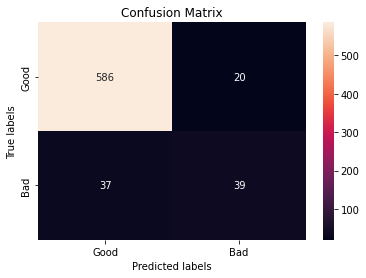

Tuning....
	->Find Best Features....


Best_Feature_Selected:   0%|          | 0/72 [00:00<?, ?round/s]

		Num Best features 21
		Best features ['cat__acc_frequency_after_transaction' 'cat__acc_frequency_weekly'
 'remainder__count_out_sanction_interest_neg_bal'
 'remainder__sum_monthly_payment_amount' 'remainder__balance_min'
 'remainder__amount_last_month_per_loan_payments'
 'remainder__balance_latest'
 'remainder__current_monthly_payment_out_payment_for_statement'
 'remainder__balance_min_last_3months'
 'remainder__amount_last_3months_avg'
 'remainder__balance_mean_per_loan_payment' 'remainder__all_client_count'
 'remainder__amount_last_3months_out_avg' 'cat__client_gender_True'
 'remainder__day_before_loan' 'cat__card_type_classic_True'
 'remainder__balance_max_last_month' 'remainder__avg_salary'
 'remainder__loan_payments'
 'remainder__current_monthly_payment_amount_out'
 'remainder__balance_min_last_month']
	->Best Features performance with SMOTE
Acc: 0.9266410912190963
F1: 0.6448772795831619
ROC AUC: 0.7843901249024199


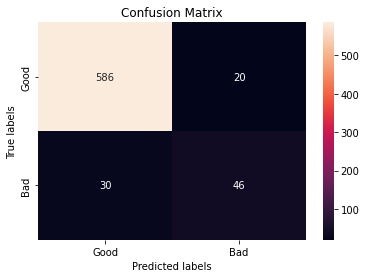

	->Find Best Parameters....
		Best parameters {'max_depth': 30}
Refit using best params & best feature
Performance after using best params & best feature
Acc: 0.9207800511508951
F1: 0.5969816131580837
ROC AUC: 0.7576180718188914


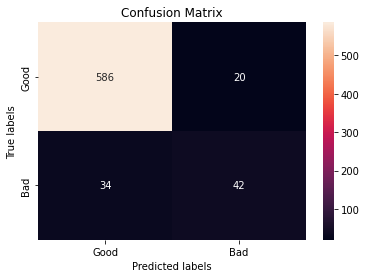

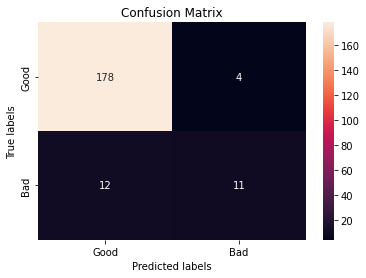

0.9219512195121952 0.5789473684210527 0.7281414237935977


{'Accuracy': [],
 'Best Features': [array(['cat__acc_frequency_after_transaction',
         'cat__acc_frequency_weekly',
         'remainder__count_out_sanction_interest_neg_bal',
         'remainder__sum_monthly_payment_amount', 'remainder__balance_min',
         'remainder__amount_last_month_per_loan_payments',
         'remainder__balance_latest',
         'remainder__current_monthly_payment_out_payment_for_statement',
         'remainder__balance_min_last_3months',
         'remainder__amount_last_3months_avg',
         'remainder__balance_mean_per_loan_payment',
         'remainder__all_client_count',
         'remainder__amount_last_3months_out_avg',
         'cat__client_gender_True', 'remainder__day_before_loan',
         'cat__card_type_classic_True', 'remainder__balance_max_last_month',
         'remainder__avg_salary', 'remainder__loan_payments',
         'remainder__current_monthly_payment_amount_out',
         'remainder__balance_min_last_month'], dtype='<U60')],
 'Best Pa

In [20]:
xgb_model =  ('xgbclassifier', 
           XGBClassifier(objective="binary:logistic", random_state = 0, n_jobs = -1, eval_metric='logloss').fit(X.values, y),
           { 
               "max_depth": [6, 10, 20, 30, 40],
            #   "gamma": np.arange(0, 0.1, 0.025).tolist(),
            #   "min_child_weight": np.arange(0, 3, 1).tolist(),
            #   "reg_lambda": np.arange(20, 70, 10).tolist() + [1],
            #   "scale_pos_weight": np.arange(2, 14, 2).tolist() + [1],
               
            #    "max_depth": [7],
            #   "gamma": np.arange(0.4, 0.45, 0.01).tolist(),
            #   "min_child_weight": [1, 2],
            #   "reg_lambda": [4, 5, 6],
            #   "scale_pos_weight": [1, 2, 3, 4],
            # "eta": [5, 10, 20, 1],
            # "max_delta_step": [-1, 0, 1, 2],
            # "subsample":np.arange(0.0, 1, 0.5).tolist(), 
            # "colsample_bytree":np.arange(0.5, 1, 0.5).tolist(),
            # "alpha":np.arange(0.0, 5, 1).tolist(),
            # "lambda":np.arange(0.0, 2, 1).tolist(),
            })

Report = Runnnnnnnnning___([xgb_model], X, y, k=10)
Report

# Profit

In [21]:

xgb_params = {'max_depth': 30, 'gamma': 0.0,
   'max_depth': 6,
   'min_child_weight': 1,
   'reg_lambda': 40,
   'scale_pos_weight': 8}

xgb_feature = np.array(['cat__acc_frequency_after_transaction',
         'cat__acc_frequency_weekly',
         'remainder__count_out_sanction_interest_neg_bal',
         'remainder__balance_min',
         'remainder__amount_last_month_per_loan_payments',
         'remainder__current_monthly_payment_out_payment_for_statement',
         'remainder__count_monthly_payment_trans',
         'remainder__amount_last_mount_out_per_loan_payments',
         'remainder__balance_latest', 'remainder__balance_mean',
         'remainder__balance_max_last_month',
         'remainder__balance_min_last_month',
         'remainder__balance_min_last_3months',
         'remainder__all_client_count', 'cat__card_type_classic_True',
         'remainder__balance_mean_per_loan_payment',
         'remainder__balance_mean_last_month_per_loan_payment',
         'remainder__balance_mean_last_month', 'remainder__growth_balance',
         'remainder__urban_rate', 'remainder__sum_monthly_payment_amount',
         'remainder__amount_last_3months_out_avg',
         'remainder__day_before_loan', 'remainder__sum_other_amount_out',
         'remainder__sum_monthly_payment_out_insurrance',
         'remainder__amount_last_3months_in_per_loan_payments',
         'remainder__sum_monthly_payment_amount_in',
         'remainder__sum_monthly_payment_out_household',
         'remainder__amount_last_month_in', 'remainder__avg_salary',
         'remainder__loan_payments', 'cat__client_gender_True',
         'remainder__client_age', 'remainder__unemploy_rate',
         'remainder__amount_last_3months_in_per_loan_amount',
         'remainder__sum_monthly_payment_in_interest_credited',
         'remainder__sum_monthly_payment_out_payment_for_statement',
         'remainder__amount_last_3months_in_avg',
         'remainder__num_enterpreneurs_per1000inhabitants',
         'remainder__all_client_mean_age',
         'remainder__current_monthly_payment_out_household',
         'remainder__balance_mean_last_month_per_loan_amount',
         'remainder__loan_duration', 'remainder__balance_max_last_3months',
         'remainder__num_inhabitants',
         'remainder__balance_mean_last_3months', 'remainder__loan_amount',
         'remainder__current_monthly_payment_in_interest_credited',
         'remainder__count_other_trans',
         'remainder__amount_last_month_per_loan_amount',
         'remainder__amount_last_mount_in_per_loan_payments',
         'remainder__amount_last_month', 'remainder__sum_other_amount',
         'remainder__balance_max',
         'remainder__amount_last_mount_out_per_loan_amount',
         'remainder__sum_monthly_payment_amount_out',
         'remainder__amount_last_mount_in_per_loan_amount'])

In [22]:
selected_feature = xgb_feature

In [23]:
selected_feature_X = X[selected_feature]
selected_model = XGBClassifier(objective="binary:logistic", random_state = 0, n_jobs = -1, eval_metric='logloss', **xgb_params)
selected_model

XGBClassifier(eval_metric='logloss', gamma=0.0, max_depth=6, n_jobs=-1,
              reg_lambda=40, scale_pos_weight=8)

In [26]:

raw_df = pd.read_csv(url)
raw_df.head()

,account_id,loan_amount,loan_duration,loan_payments,loan_status,acc_frequency,day_before_loan,sum_monthly_payment_amount,sum_monthly_payment_amount_in,sum_monthly_payment_amount_out,...,amount_last_mount_out_per_loan_amount,amount_last_3months_avg,amount_last_3months_in_avg,amount_last_3months_out_avg,amount_last_3months_per_loan_payments,amount_last_3months_in_per_loan_payments,amount_last_3months_out_per_loan_payments,amount_last_3months_per_loan_amount,amount_last_3months_in_per_loan_amount,amount_last_3months_out_per_loan_amount
0,2,80952,24,3373,A,monthly,313,120.482428,4.124601,116.357827,...,0.425894,44114.333333,23734.666667,20379.666667,13.078664,7.036664,6.042000,0.544944,0.293194,0.251750
1,19,30276,12,2523,B,monthly,388,335.966495,7.306701,328.659794,...,0.601632,36373.333333,17858.333333,18515.000000,14.416700,7.078214,7.338486,1.201392,0.589851,0.611540
2,25,30276,12,2523,A,monthly,498,204.881526,8.206827,196.674699,...,3.150482,115321.666667,53753.000000,61568.666667,45.708152,21.305192,24.402959,3.809013,1.775433,2.033580
3,37,318480,60,5308,D,monthly,422,74.492891,5.457346,69.035545,...,0.103344,60867.000000,30319.333333,30547.666667,11.467031,5.712007,5.755024,0.191117,0.095200,0.095917
4,38,110736,48,2307,C,weekly,254,117.125984,4.385827,112.740157,...,0.089312,29212.333333,16590.333333,12622.000000,12.662477,7.191302,5.471175,0.263802,0.149819,0.113983


In [27]:
def cal_revenue(total_amount, loan_duration_month, paid_month, interest_rate_peryear):
    '''
    Interest (Compound) = P(1+i)^t - P
    P = all / (1+i)^t
    '''
    principle = total_amount / (1+interest_rate_peryear)**(loan_duration_month//12)
    expected_revenue = total_amount - principle
    revenue = paid_month * expected_revenue / loan_duration_month
    return revenue

def cal_cost(loan_payment, loan_duration_month, paid_month):
    not_paid_month = loan_duration_month - paid_month
    cost = not_paid_month * loan_payment
    return cost

def kfold_test_smote(X, y, model, profit, account_id,  k=5, smote=True, threshold=None):
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=0)
    df = pd.DataFrame({'test_idx' : np.array([]),
                       'y_true' : np.array([]),
                       'probs' : np.array([]),
                       'account_id' : np.array([])})
    
   

    for fold, (train_index, test_index) in enumerate(cv.split(X, y)):
        new_df = pd.DataFrame({'test_idx' : np.array([]),
                       'y_true' : np.array([]),
                       'probs' : np.array([]),
                       'account_id' : np.array([])})
        X_train = X.iloc[train_index, :]
        y_train = y[train_index] 
        X_test = X.iloc[test_index, :]
        y_test = y[test_index]  # See comment on ravel and  y_train
        profit_test = profit[test_index]
        account_id_test = account_id[test_index]

        if smote:
            sm = SMOTE(sampling_strategy=0.5, random_state=0)
            X_train, y_train = sm.fit_resample(X_train, y_train)
        # model = ...  # Choose a model here
        model.fit(X_train, y_train)  
        y_pred = model.predict_proba(X_test)
        probs = y_pred[:, 1]
        new_df['test_idx'] = test_index
        new_df['y_true'] = y_test
        new_df['probs'] = probs
        new_df['account_id'] = account_id_test
        df = pd.concat([df.reset_index(drop = True), new_df.reset_index(drop = True)], axis =0)
        


    return df

def profit_maximize(y_true, y_pred, profit):
    '''
        Actual  predict
    TN: Good 0   Good 0   -> get money from profit
    TP: Bad 1    Bad 1  -> we will not issue profit (-) = 0 
    FN: Good 0    Bad 1   -> we will not issue profit (+) = 0
    FP: Bad 1    Good 0  -> we lost, cost > revenue profit (-)
    '''
    df = pd.DataFrame({'actual': y_true,
                        'predict': y_pred,
                       'profit':profit})
    # TN
    df.loc[(df['actual']==0) & (df['predict']==0), ['profit']] = profit

    # TP 
    df.loc[(df['actual']==1) & (df['predict']==1), ['profit']] = 0

    # FN
    df.loc[(df['actual']==0) & (df['predict']==1), ['profit']] = 0

    # FP
    df.loc[(df['actual']==1) & (df['predict']==0), ['profit']] = profit
    return df['profit'].sum()

In [28]:
url = 'https://raw.githubusercontent.com/sorayutmild/loan-default-prediction/main/after_trans_payment_for_loan.csv?raw=true'
after_trans_for_loan = pd.read_csv(url)

interest_rate_peryear = 0.05

revenue = cal_revenue(total_amount=X['remainder__loan_amount'], 
                loan_duration_month=X['remainder__loan_duration'], 
                paid_month=after_trans_for_loan['count_loan_trans'], 
                interest_rate_peryear=interest_rate_peryear)

cost = cal_cost(loan_payment=X['remainder__loan_payments'], 
                loan_duration_month=X['remainder__loan_duration'],
                paid_month=after_trans_for_loan['count_loan_trans'])

profit = revenue - cost
profit.sum()

13039536.921046285

In [29]:
res =  kfold_test_smote(selected_feature_X, y, selected_model, profit, account_id=raw_df['account_id'].values, k=5, threshold=0.8534)
report  = res.sort_values('account_id').set_index('test_idx')

In [30]:
report['y_true'] =y

In [31]:
report.to_csv('report.csv',index=False)

In [32]:
report['y_pred'] = to_labels(report['probs'],0.85)
report['case_TP'] = report['y_true'].astype(int) & report['y_pred'].astype(int) 
report['case_FN'] = ((report['y_true'].astype(int) == 1) & (report['y_pred'].astype(int) == 0)).astype(int)
report['case_FP'] = ((report['y_true'].astype(int) == 0) & (report['y_pred'].astype(int) == 1)).astype(int)
report['case_TN'] = ( report['y_true'].astype(int) | report['y_pred'].astype(int) == 0).astype(int)
report

,y_true,probs,account_id,y_pred,case_TP,case_FN,case_FP,case_TN
test_idx,,,,,,,,
0.0,0.0,0.030260,2.0,0,0,0,0,1
1.0,1.0,0.758966,19.0,0,0,1,0,0
2.0,0.0,0.028577,25.0,0,0,0,0,1
3.0,1.0,0.993018,37.0,1,1,0,0,0
4.0,0.0,0.135593,38.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
677.0,0.0,0.037414,11327.0,0,0,0,0,1
678.0,0.0,0.078086,11328.0,0,0,0,0,1
679.0,0.0,0.369491,11349.0,0,0,0,0,1


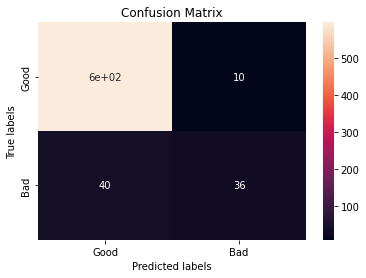

In [33]:

ax= plt.subplot()
cf_matrix = [[report['case_TN'].sum(),  report['case_FP'].sum()],
       [ report['case_FN'].sum(), report['case_TP'].sum() ]]
sns.heatmap(cf_matrix, annot=True, ax=ax)
    # labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Good', 'Bad']); ax.yaxis.set_ticklabels(['Good', 'Bad']);
plt.show()
